※본 커널은 캐글을 통해 공유된 "DJIA 30 Stock Time Series"(https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231/kernels) Dataset 의 Kernel 중 "Everything you can do with a time series"(https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series) 의 내용을 기반으로 작성되었습니다.

## Colab 사용 환경

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/JK/TimeSeries/src

/content/gdrive/My Drive/JK/TimeSeries/src


In [3]:
pwd

'/content/gdrive/My Drive/JK/TimeSeries/src'

# Aim
이 플랫폼의 첫 주부터 **시계열 분석(time series analysis)**이라는 주제에 매료되었습니다. 이 커널은 시계열 분석 분야에서 다양한 주제의 컨테이너가 될 수 있도록 준비되었습니다. 초보자와 숙련된 사람들 모두에게 시계열 분석에 대한 궁극적인 참조가 되도록하는 것이 목표입니다.

# Some important things
1. 이 커널은 진행중인 작업이므로 볼 때마다 새로운 컨텐츠를 찾을 수 있습니다.
2. 이 분야에서 다양한 과정을 마친 후에 ​​이 작업을 하고 있습니다. 더 많은 지식과 내용을 제공하기 위해 더 고급 개념을 연구하고 있습니다.
3. 내가 다루었으면 하는 제안이나 특정 주제가 있으면 comments에 그 내용을 적어주십시오.
4. 내 작업이 마음에 들면 이 커널을 커뮤니티에 보다 적절하고 의미있게 보이도록 이 커널을 upvote (like 버튼을 누름) 해 주십시오.

# Table of Contents

- <a href='#1'>1. Introduction to date and time</a>
    - <a href='#1.1'>1.1 Importing time series data</a>
    - <a href='#1.2'>1.2 Cleaning and preparing time series data</a>
    - <a href='#1.3'>1.3 Visualizing the datasets</a>
    - <a href='#1.4'>1.4 Timestamps and Periods</a>
    - <a href='#1.5'>1.5 Using date_range</a>
    - <a href='#1.6'>1.6 Using to_datetime</a>
    - <a href='#1.7'>1.7 Shifting and lags</a>
    - <a href='#1.8'>1.8 Resampling</a>
- <a href='#2'>2. Finance and Statistics</a>
    - <a href='#2.1'>2.1 Percent change</a>
    - <a href='#2.2'>2.2 Stock returns</a>
    - <a href='#2.3'>2.3 Absolute change in successive rows</a>
    - <a href='#2.4'>2.4 Comaring two or more time series</a>
    - <a href='#2.5'>2.5 Window functions</a>
    - <a href='#2.6'>2.6 OHLC charts</a>
    - <a href='#2.7'>2.7 Candlestick charts</a>
    - <a href='#2.8'>2.8 Autocorrelation and Partial Autocorrelation</a>
- <a href='#3'>3. Time series decomposition and Random Walks</a>
    - <a href='#3.1'>3.1 Trends, Seasonality and Noise</a>
    - <a href='#3.2'>3.2 White Noise</a>
    - <a href='#3.3'>3.3 Random Walk</a>
    - <a href='#3.4'>3.4 Stationarity</a>
- <a href='#4'>4. Modelling using statsmodels</a>
    - <a href='#4.1'>4.1 AR models</a>
    - <a href='#4.2'>4.2 MA models</a>
    - <a href='#4.3'>4.3 ARMA models</a>
    - <a href='#4.4'>4.4 ARIMA models</a>
    - <a href='#4.5'>4.5 VAR models</a>
    - <a href='#4.6'>4.6 State space methods</a>
        - <a href='#4.6.1'>4.6.1 SARIMA models</a>
        - <a href='#4.6.2'>4.6.2 Unobserved components</a>
        - <a href='#4.6.3'>4.6.3 Dynamic Factor models</a>

## Imports

In [4]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams

from plotly import tools
#import plotly.plotly as py
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

## Functions

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [6]:
configure_plotly_browser_state()
py.init_notebook_mode(connected=False)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
print(os.listdir("../input"))

['historical-hourly-weather-data', 'stock-time-series-20050101-to-20171231']


# <a id='1'>1. Introduction to date and time</a>

## <a id='1.1'>1.1 Importing time series data</a>

### How to import data?
먼저 이 커널에 필요한 모든 데이터 세트를 가져옵니다. 필수 시계열 열(column)은 parse_dates 매개 변수를 사용하여 datetime 열로 가져오며 index_col 매개 변수를 사용하여 데이터 프레임의 인덱스로도 선택됩니다.
 
#### Data being used:-
1. Google  Stocks Data
2. Humidity in different world cities
3. Microsoft  Stocks Data
3. Pressure in different world cities

In [8]:
google = pd.read_csv('../input/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [0]:
humidity = pd.read_csv('../input/historical-hourly-weather-data/humidity.csv', index_col='datetime', parse_dates=['datetime'])

In [10]:
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,NaN,20.0,45.0,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,NaN,23.0,48.0,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,NaN,27.0,52.0,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,37.0,45.0,49.0,30.0,35.0,46.0,75.0,39.0,52.0,82.0,52.0,73.0,38.0,NaN,36.0,64.0,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,48.0,42.0,52.0,32.0,38.0,46.0,86.0,41.0,52.0,100.0,56.0,88.0,41.0,NaN,42.0,60.0,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


## <a id='1.2'>1.2 Cleaning and preparing time series data</a>

### How to prepare data?
Google 주식 데이터에는 결측값이 없지만 습도 데이터에는 결측값이 있습니다. 

#### fillna
결측값을 채우기 위해서는 **fillna**() 메소드를 사용하는 데, ffill 매개 변수를 사용한다. **ffill** 을 사용하면 결측값 이전의 마지막 유효 observation을 사용하여 결측값을 채운다.

In [12]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,92.0,86.0,88.0,69.0,65.0,71.0,69.0,99.0,76.0,94.0,74.0,86.0,87.0,81.0,93.0,76.0,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


## <a id='1.3'>1.3 Visualizing the datasets</a>

#### asfreq
asfreq 방법은 시계열을 지정된 빈도(frequency)로 변환하는 데 사용됩니다. 'M' 은 월간 빈도입니다.

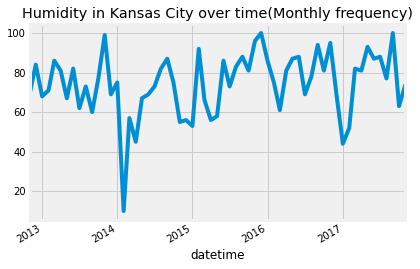

In [13]:
humidity["Kansas City"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

#### df.plot
google df 의 모든 컬럼값에 대한 추이를 차트로 표시합니다.

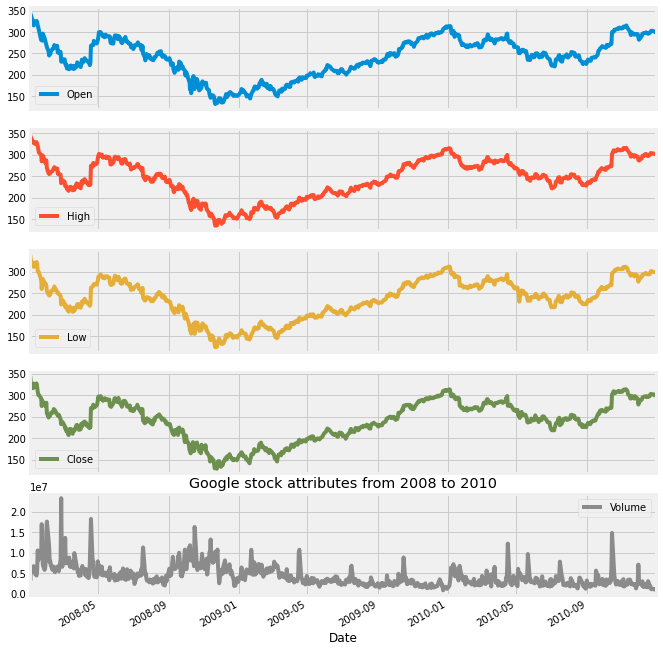

In [14]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

## <a id='1.4'>1.4 Timestamps and Periods</a>

### What are timestamps and periods and how are they useful?
* 타임스탬프(Timestamp)는 특정 시점을 나타내는 데 사용됩니다. 
* 기간(Period)은 시간 간격을 나타냅니다. 기간(Period)은 주어진 기간에 특정 이벤트가 있는지 확인하는 데 사용될 수 있습니다. 
* 또한 서로의 형태로 변환될 수도 있습니다.

In [15]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [16]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [17]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [18]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [19]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

## <a id='1.5'>1.5 Using date_range</a>

### What is date_range and how is it useful?
**date_range**는 고정 빈도 datetimeindex를 반환하는 메서드입니다. 기존 데이터에 대한 고유한 시계열 특성을 만들거나 사용자가 만든 시계열 특성을 중심으로 전체 데이터를 정렬할 때 매우 유용합니다.

In [20]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [22]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

## <a id='1.6'>1.6 Using to_datetime</a> 

pandas.to_datetime()은 인수를 datetime으로 변환하는 데 사용됩니다. 여기서 DataFrame은 datetime series 변환됩니다.

In [24]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [25]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [26]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

## <a id='1.7'>1.7 Shifting and lags</a>

선택적인 시간 빈도로 원하는 기간 만큼 인덱스를 이동할 수 있습니다. 이것은 시계열을 과거와 비교할 때 유용합니다.

asfreq('M').shift(10) 를 사용하여 10개월 이전것을 가져와서 현재와 비교합니다.

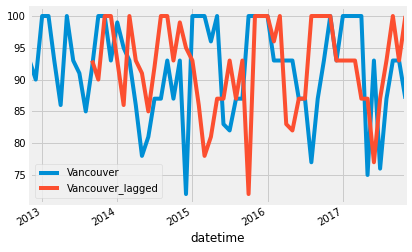

In [27]:
humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

asfreq('M').shift(12) 를 사용하여 12개월 이전것을 가져와서 현재와 비교합니다.

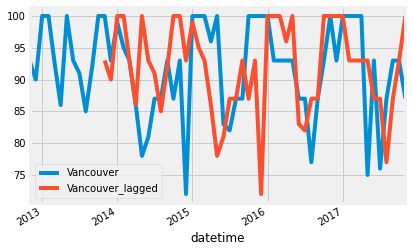

In [28]:
humidity["Vancouver"].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(12).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

## <a id='#1.8'>1.8 Resampling</a>
**Upsampling** - 시계열이 저빈도에서 고빈도로 (월간에서 일일 빈도로) 리샘플링됩니다. 누락 된 데이터를 채우거나(filling) 보간하는(interpolating) 작업

**Downsampling** - 시계열이 고빈도에서 저빈도로 (주간에서 월간 빈도로) 리샘플링됩니다. 기존 데이터의 집계가(aggregation) 포함됩니다.

In [29]:
# Let's use pressure data to demonstrate this
pressure = pd.read_csv('../input/historical-hourly-weather-data/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,1031.0,NaN,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,1022.0,1021.0,1021.0,1020.0,1018.0,1023.0,1025.0,1023.0,1025.0,1024.0,1027.0,1021.0,1023.0,NaN,1024.0,1026.0,1021.0,NaN,1021.0,1017.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,1030.0,NaN,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,1021.0,1021.0,1021.0,1021.0,1017.0,1022.0,1024.0,1022.0,1024.0,1023.0,1027.0,1021.0,1023.0,NaN,1024.0,1026.0,1021.0,NaN,1023.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,1030.0,NaN,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,1021.0,1021.0,1020.0,1020.0,1016.0,1021.0,1024.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,NaN,1024.0,1026.0,1022.0,NaN,1024.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,1029.0,NaN,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,1021.0,1021.0,1020.0,1019.0,1015.0,1021.0,1023.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,NaN,1024.0,1027.0,1023.0,NaN,1026.0,1022.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,1029.0,NaN,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,1021.0,1021.0,1020.0,1019.0,1016.0,1021.0,1023.0,1023.0,1023.0,1024.0,1027.0,1022.0,1024.0,NaN,1025.0,1027.0,1024.0,NaN,1027.0,1023.0,NaN,NaN,NaN,NaN,NaN,NaN


휴! 많은 청소가(cleaning) 필요합니다.

먼저, 결측치를 채우기 위해서 fillna 를 사용할 때, 마지막 유효 관측치(observation)를 사용하여 간격을 메우는 ffill 매개 변수를 사용했습니다.

In [30]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,1021.0,1031.0,1013.0,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,1022.0,1021.0,1021.0,1020.0,1018.0,1023.0,1025.0,1023.0,1025.0,1024.0,1027.0,1021.0,1023.0,1015.0,1024.0,1026.0,1021.0,1020.0,1021.0,1017.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 21:00:00,1021.0,1030.0,1013.0,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,1021.0,1021.0,1021.0,1021.0,1017.0,1022.0,1024.0,1022.0,1024.0,1023.0,1027.0,1021.0,1023.0,1015.0,1024.0,1026.0,1021.0,1020.0,1023.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 22:00:00,1021.0,1030.0,1013.0,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,1021.0,1021.0,1020.0,1020.0,1016.0,1021.0,1024.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,1015.0,1024.0,1026.0,1022.0,1020.0,1024.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 23:00:00,1021.0,1029.0,1013.0,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,1021.0,1021.0,1020.0,1019.0,1015.0,1021.0,1023.0,1023.0,1024.0,1023.0,1027.0,1022.0,1023.0,1015.0,1024.0,1027.0,1023.0,1020.0,1026.0,1022.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-30 00:00:00,1021.0,1029.0,1013.0,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,1021.0,1021.0,1020.0,1019.0,1016.0,1021.0,1023.0,1023.0,1023.0,1024.0,1027.0,1022.0,1024.0,1015.0,1025.0,1027.0,1024.0,1020.0,1027.0,1023.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0


In [31]:
pressure.isnull().sum()

Vancouver            20
Portland              0
San Francisco         0
Seattle               0
Los Angeles           0
San Diego             0
Las Vegas             0
Phoenix               0
Albuquerque           0
Denver                0
San Antonio           0
Dallas                0
Houston               0
Kansas City           0
Minneapolis           0
Saint Louis           0
Chicago               0
Nashville             0
Indianapolis          0
Atlanta               0
Detroit               0
Jacksonville          0
Charlotte             0
Miami                 0
Pittsburgh            0
Toronto               0
Philadelphia          0
New York              0
Montreal              0
Boston                0
Beersheba             0
Tel Aviv District     0
Eilat                 0
Haifa                 0
Nahariyya             0
Jerusalem             0
dtype: int64

그런 다음 bfill을 사용하여 다음 유효한 관측치(observation)를 전파하여 간격을 채웁니다.

In [32]:
pressure = pressure.fillna(method='bfill')
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1009.0,1011.0,1012.0,1010.0,1014.0,1005.0,1011.0,1006.0,1016.0,1009.0,1012.0,1011.0,1015.0,1012.0,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1011.0,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1011.0,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1010.0,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,1014.0,1011.0,1008.0,1011.0,1012.0,1010.0,1014.0,1004.0,1011.0,1006.0,1015.0,1009.0,1012.0,1011.0,1015.0,1010.0,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [33]:
pressure.isnull().sum()

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [34]:
# Shape before resampling(downsampling)
pressure.shape

(45252, 36)

In [35]:
# We downsample from hourly to 3 day frequency aggregated using mean
pressure = pressure.resample('3D').mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.000000,1013.000000,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,1017.708333,1016.416667,1017.652778,1017.305556,1015.111111,1018.388889,1015.875000,1020.652778,1018.388889,1021.430556,1017.277778,1020.000000,1021.222222,1018.500000,1019.069444,1006.958333,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,1020.402778,1022.819444,1018.791667,1022.986111,1017.388889,1023.111111,1020.569444,1021.111111,1021.180556,1017.791667,1019.388889,1015.347222,1017.833333,1013.958333,1018.625000,1007.694444,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,1015.236111,1016.277778,1017.791667,1014.611111,1009.625000,1019.069444,1015.458333,1019.333333,1017.208333,1018.208333,1015.708333,1018.625000,1019.513889,1016.222222,1015.611111,1007.541667,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,1017.611111,1016.555556,1017.972222,1013.680556,1014.763889,1016.805556,1016.347222,1021.388889,1018.708333,1023.305556,1019.472222,1021.569444,1025.500000,1017.333333,1021.375000,1016.097222,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [36]:
# Shape after resampling(downsampling)
pressure.shape

(629, 36)

행이 훨씬 적습니다. (3일 resample 했으므로 45252 / 24 / 3 = 629)

이제 3일 빈도에서 일일 빈도로 업샘플링(upsample)하겠습니다.

In [37]:
pressure = pressure.resample('D').pad()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-02,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-03,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,1014.305085,1011.525424,1009.881356,1011.915254,1012.949153,1009.525424,1012.372881,1004.627119,1008.949153,1006.593220,1013.661017,1009.271186,1011.372881,1011.915254,1012.745763,1005.711864,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,1017.708333,1016.416667,1017.652778,1017.305556,1015.111111,1018.388889,1015.875000,1020.652778,1018.388889,1021.430556,1017.277778,1020.000000,1021.222222,1018.500000,1019.069444,1006.958333,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333
2012-10-05,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,1017.708333,1016.416667,1017.652778,1017.305556,1015.111111,1018.388889,1015.875000,1020.652778,1018.388889,1021.430556,1017.277778,1020.000000,1021.222222,1018.500000,1019.069444,1006.958333,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333


In [38]:
# Shape after resampling(upsampling)
pressure.shape

(1885, 36)

다시 행(row) 수가 증가합니다. (일일 resample 했으므로 (629-1) * 3 + 1 = 1885)

올바르게 사용하면 리샘플링(resampling)이 좋습니다.

# <a id='2'>2. Finance and statistics</a>

## <a id='2.1'>2.1 Percent change</a>

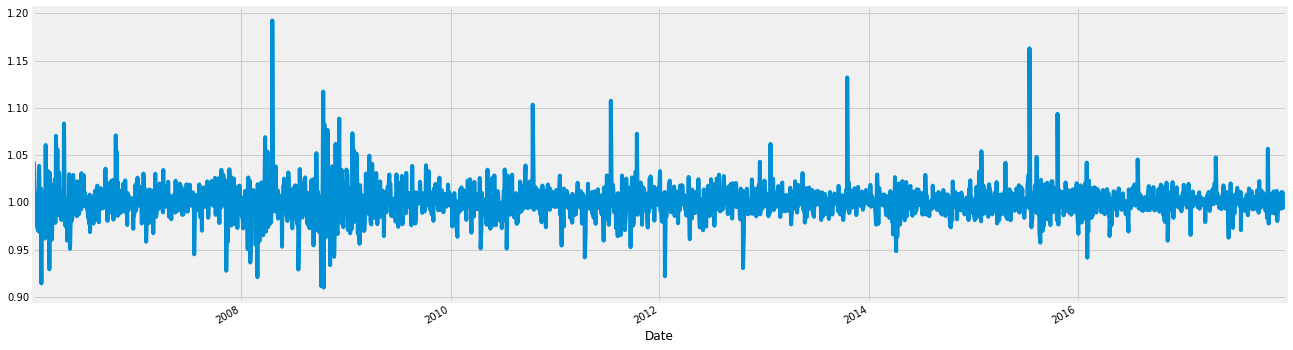

In [39]:
# Change(변화율) = 당일고가 / 전일고가
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,6))

## <a id='2.2'>2.2 Stock returns</a> 

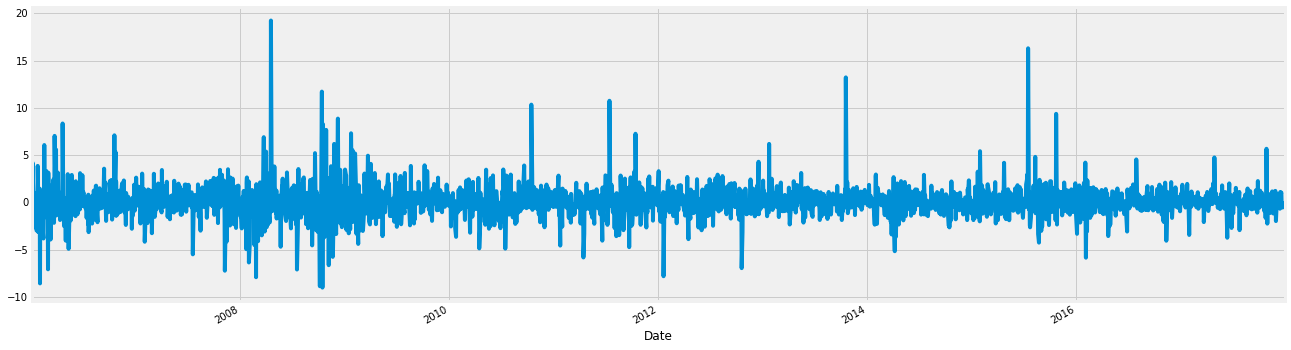

In [40]:
# Return(수익율) = (당일Change - 1) * 100
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,6))

pct_change : Percentage change between the current and a prior element. 

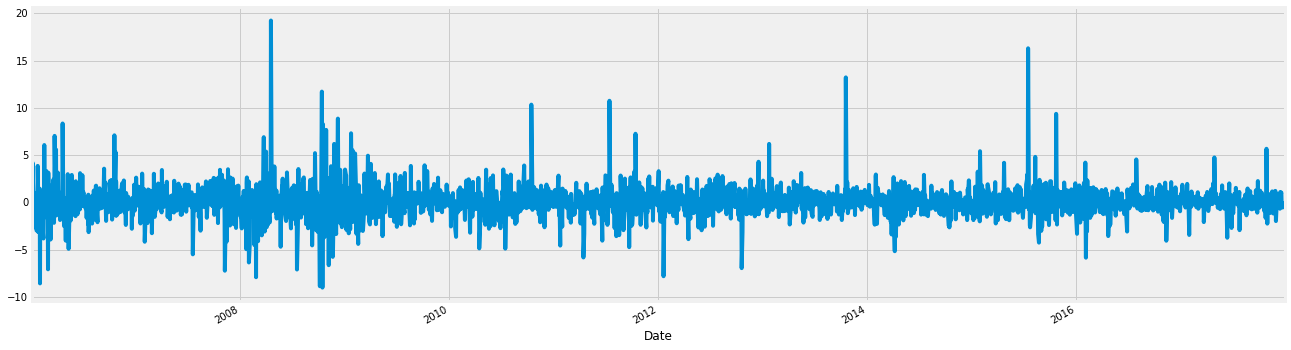

In [41]:
 # Another way to calculate returns
 google.High.pct_change().mul(100).plot(figsize=(20,6))

## <a id='2.3'>2.3 Absolute change in successive rows</a>

diff : Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is the element in the same column of the previous row).

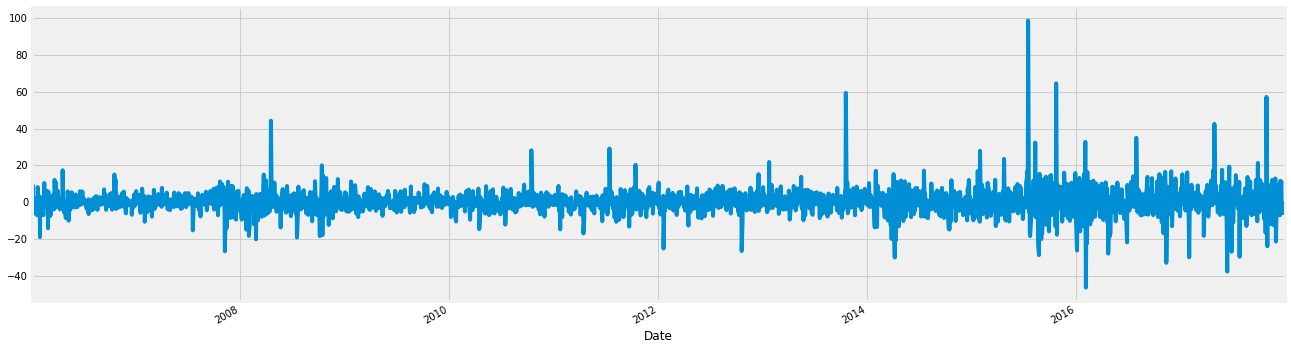

In [42]:
google.High.diff().plot(figsize=(20,6))

In [43]:
google.head()

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.030498,3.049759
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.005785,0.578549
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.041991,4.199115
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.006157,0.615737


In [44]:
google.High.diff()

Date
2006-01-03     NaN
2006-01-04    6.65
2006-01-05    1.30
2006-01-06    9.49
2006-01-09    1.45
              ... 
2017-12-22   -5.80
2017-12-26   -2.86
2017-12-27   -0.59
2017-12-28   -3.43
2017-12-29   -6.79
Name: High, Length: 3019, dtype: float64

## <a id='2.4'>2.4 Comaring two or more time series</a> 

2개의 시계열을 정규화하여 비교합니다. 이것은 모든 시계열의 각 시계열 요소를 첫 번째 요소로 나눔으로써 달성됩니다. 이 방법으로 두 시리즈 모두 같은 지점에서 시작하여 쉽게 비교할 수 있습니다.

In [0]:
# We choose microsoft stocks to compare them with google
microsoft = pd.read_csv('../input/stock-time-series-20050101-to-20171231/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

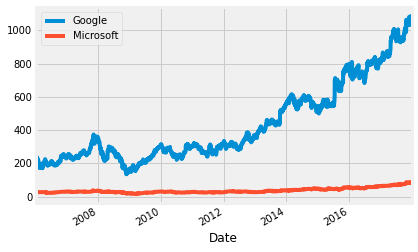

In [46]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

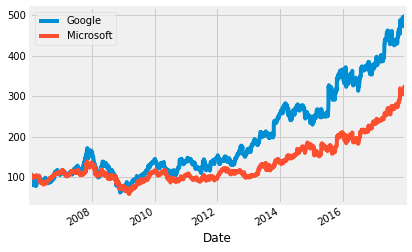

In [47]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

Google이 시간이 지남에 따라 Microsoft보다 어떻게 우수한지 알 수 있습니다.

## <a id='2.5'>2.5 Window functions</a>
window 함수는 하위 기간(sub period)을 식별하고 하위 기간(sub-period)의 하위 메트릭(sub-metric)을 계산하는 데 사용됩니다.

**Rolling** - Same size and sliding

**Expanding** - Contains all prior values

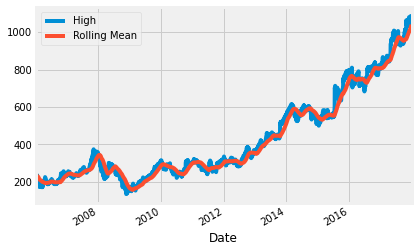

In [48]:
# Rolling window functions
rolling_google = google.High.rolling('90D').mean()    # google 고가 90일 이동평균
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

롤링 평균 plot는 원래 plot의 평활화(smoother) 버전입니다.

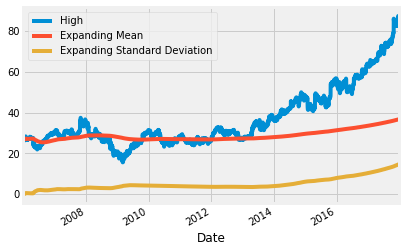

In [49]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## <a id='2.6'>2.6 OHLC charts</a>
OHLC 차트는 특정 기간의 시가, 고가, 저가 및 종가를 보여주는 모든 유형의 가격 차트입니다. 시가-고가-저가-종가 차트 (또는 OHLC 차트)는 유가 증권, 통화, 주식, 채권, 상품 등의 시간에 따른 가격 변동을 시각화하고 분석하는 거래 도구로 사용됩니다. OHLC 차트는 시장의 일상 정서를 해석하고 생산 패턴을 통해 미래의 가격 변동을 예측하는 데 유용합니다.

OHLC 차트의 y 축은 가격 척도에 사용되며 x 축은 시간 척도입니다. 각 단일 기간에 OHLC 차트는 거래된 최고 및 최저 가격과 해당 단일 기간(예:하루)의 개시 및 마감 가격의 두 가지 범위를 나타내는 기호를 표시합니다. 시가와 종가는 고가-저가 수직선의 왼쪽 (시가를 나타냄)과 오른쪽 (종가를 나타냄)에 나타나는 눈금 표시(tick-mark)의 수직 위치로 표시됩니다.

각 OHLC 차트 기호에 색상을 지정하여 시장이 "bullish"(종가가 시가보다 높은지) 또는 "bearish"(종가가 시가보다 낮은지를)를 구별할 수 있습니다.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg">

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/OHLC_chart.html)

In [0]:
# OHLC chart of June 2008
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]

In [51]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)

iplot(data, filename='simple_ohlc')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# OHLC chart of 2008
trace = go.Ohlc(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]

In [53]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)

iplot(data, filename='simple_ohlc')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# OHLC chart of 2008
trace = go.Ohlc(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]

In [55]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)

iplot(data, filename='simple_ohlc')

Output hidden; open in https://colab.research.google.com to view.

 ## <a id='2.7'>2.7 Candlestick charts</a>
이 유형의 차트는 유가 증권, 파생 상품, 통화, 주식, 채권, 상품 등에 대한 시간 경과에 따른 가격 변동을 시각화하고 분석하는 거래 도구로 사용됩니다. 캔들 스틱 차트에 사용된 기호는 Box Plot과 비슷하지만 기능이 다릅니다. 그러므로 서로 혼동해서는 안된다.

캔들 스틱 차트는 캔들 스틱과 같은 기호를 사용하여 시가, 종가, 고가, 저가와 같은 여러 가격 정보를 표시합니다. 각 기호는 단일 기간 (분, 시간, 일, 월 등)에 대한 압축된 거래 활동을 나타냅니다. 각 캔들 스틱 기호는 시간에 따른 거래 활동을 보여주기 위해 x 축에 시간 척도를 따라 표시됩니다.

기호의 기본 사각형은 실제몸통 이라고하며 해당 기간의 시가와 종가 사이의 범위를 표시하는 데 사용됩니다. 실제 몸통의 아래쪽과 위쪽에서 연장되는 선을 아래쪽 및 위쪽 그림자 (또는 꼬리)라고 합니다. 각 그림자는 표시된 기간 동안 거래된 고가 또는 저가를 나타냅니다. 시장이 강세 일 때 (종가가 시가보다 높음), 몸통은 일반적으로 흰색 또는 녹색으로 표시됩니다. 그러나 시장이 약세 일 때 (종가는 시가보다 낮음), 몸통은 보통 검은 색 또는 빨간색으로 채색됩니다.

<img src="https://datavizcatalogue.com/methods/images/anatomy/SVG/candlestick_chart.svg">

캔들 스틱 차트는 시간이 지남에 따라 시장 추세를 감지하고 예측하는 데 유용하며 각 캔들 스틱 기호의 색상과 모양을 통해 시장의 일상 정서를 해석하는 데 유용합니다. 예를 들어, 몸통이 길수록 매도 또는 매수 압력이 더 강해집니다. 매우 짧은 몸통은 해당 기간 동안 가격 변동이 거의 없으며 안정(consolidation)을 나타냅니다.

캔들 스틱 차트는 모양과 색상과 같은 다양한 지표뿐만 아니라 캔들 스틱 차트에서 볼 수 있는 많은 식별 가능한 패턴을 통해 시장 심리학 (판매자와 구매자가 경험한 두려움과 탐욕)을 밝혀줍니다. 총 42 개의 인식된 패턴이 단순하고 복잡한 패턴으로 나뉩니다. 캔들 스틱 차트에 있는 이러한 패턴은 가격 관계를 표시하는 데 유용하며 시장의 향후 움직임을 예측하는 데 사용될 수 있습니다. 여기에서 각 패턴의 목록과 설명을 찾을 수 있습니다.

캔들 스틱 차트는 시가와 종가 사이에 발생하는 이벤트를 나타내지 않으며 두 가격 간의 관계만 나타냅니다. 따라서 단일 기간 내에 얼마나 변동성이 큰 거래인지 알 수 없습니다.

Source: [Datavizcatalogue](https://datavizcatalogue.com/methods/candlestick_chart.html)

In [0]:
# Candlestick chart of march 2008
trace = go.Candlestick(x=google['03-2008'].index,
                open=google['03-2008'].Open,
                high=google['03-2008'].High,
                low=google['03-2008'].Low,
                close=google['03-2008'].Close)
data = [trace]

In [57]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)

iplot(data, filename='simple_candlestick')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Candlestick chart of 2008
trace = go.Candlestick(x=google['2008'].index,
                open=google['2008'].Open,
                high=google['2008'].High,
                low=google['2008'].Low,
                close=google['2008'].Close)
data = [trace]

In [59]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)

iplot(data, filename='simple_candlestick')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Candlestick chart of 2006-2018
trace = go.Candlestick(x=google.index,
                open=google.Open,
                high=google.High,
                low=google.Low,
                close=google.Close)
data = [trace]

In [61]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)

iplot(data, filename='simple_candlestick')

Output hidden; open in https://colab.research.google.com to view.

## <a id='2.8'>2.8 Autocorrelation and Partial Autocorrelation</a>
* Autocorrelation - autocorrelation function (ACF)는 series가 서로 다른 지연(lag)에서 어떻게 상호 연관되는지 측정합니다.
* Partial autocorrelation - partial autocorrelation function는 과거 지연(lag)에 대한 series의 회귀로 해석될 수 있습니다. 이 용어는 표준 선형 회귀와 같은 방식으로 해석될 수 있습니다. 즉, 다른 항을 일정하게 유지하면서 특정 지연(lag)의 변화에 ​​기여합니다.

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

### Autocorrelation

plot_acf : Plot the autocorrelation function. Plots lags on the horizontal and the correlations on vertical axis.

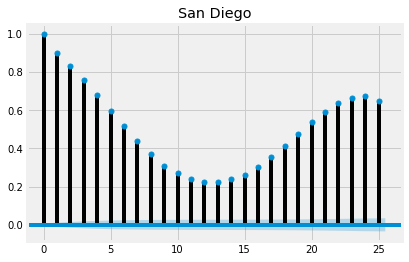

In [62]:
# Autocorrelation of humidity of San Diego
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

모든 지연(lag)은 1에 가깝거나 적어도 신뢰 구간보다 크므로 통계적으로 유의(significant)합니다.

* x축 이 lag 임

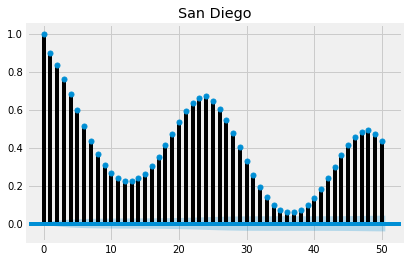

In [63]:
plot_acf(humidity["San Diego"],lags=50,title="San Diego")
plt.show()

### Partial Autocorrelation

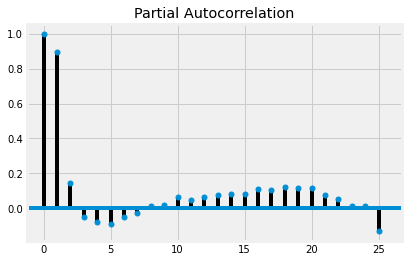

In [64]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25)
plt.show()

통계적으로 유의(significant)하지만 처음 두 지연(lag) 후 partial autocorrelation은 매우 낮습니다.

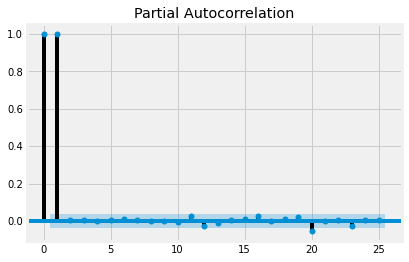

In [65]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(microsoft["Close"],lags=25)
plt.show()

여기서 0, 1, 20 번째 lag 만 통계적으로 유의(significant)합니다.

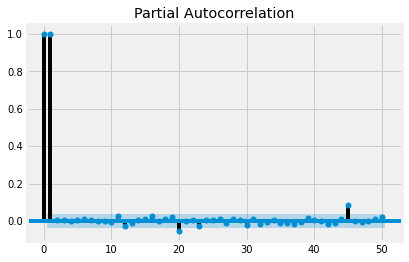

In [66]:
plot_pacf(microsoft["Close"],lags=50)
plt.show()

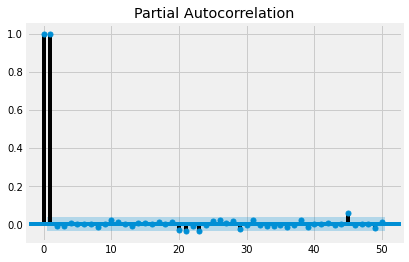

In [67]:
plot_pacf(google["Close"],lags=50)
plt.show()

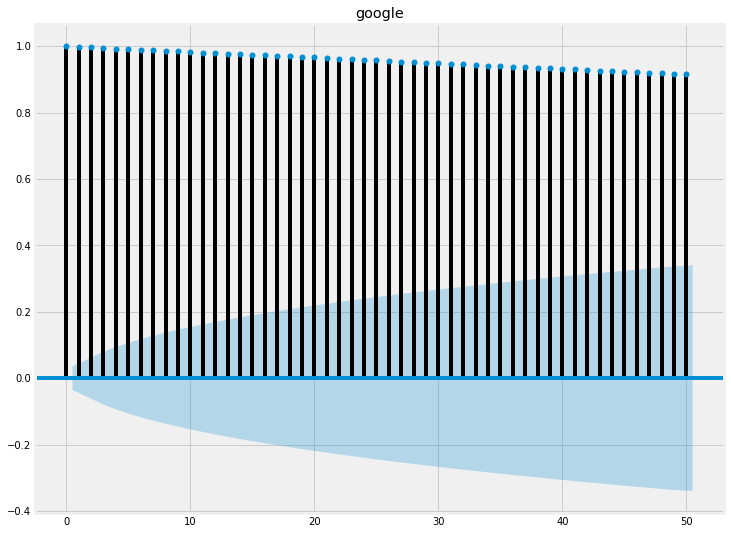

In [80]:
plot_acf(google["High"],lags=50,title="google")
plt.show()

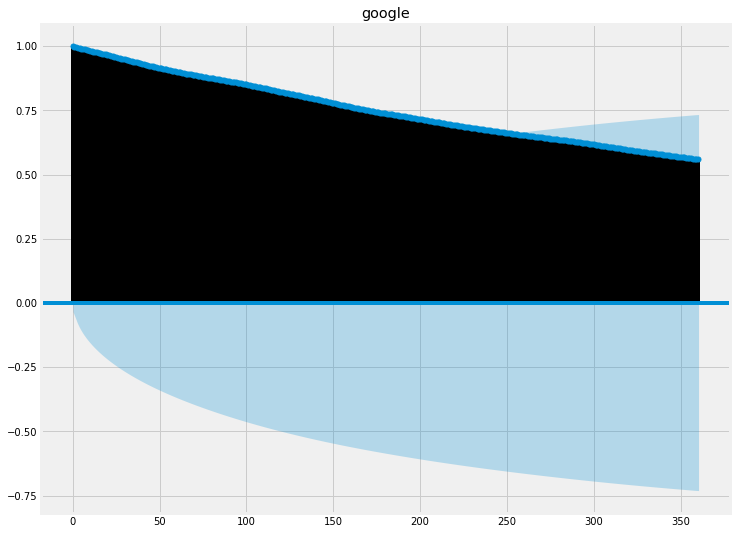

In [81]:
plot_acf(google["High"],lags=360,title="google")
plt.show()

# <a id='3'>3. Time series decomposition and Random walks</a>

## <a id='3.1'>3.1. Trends, seasonality and noise</a>
시계열의 구성 요소

* 추세(Trend) - 시계열의 일관된 상향 또는 하향 기울기
* 계절성(Seasonality) - sin 함수와 같은 시계열의 명확한 주기 패턴
* 노이즈(Noise) - 특이치(Outliers) 또는 결측값(missing values)

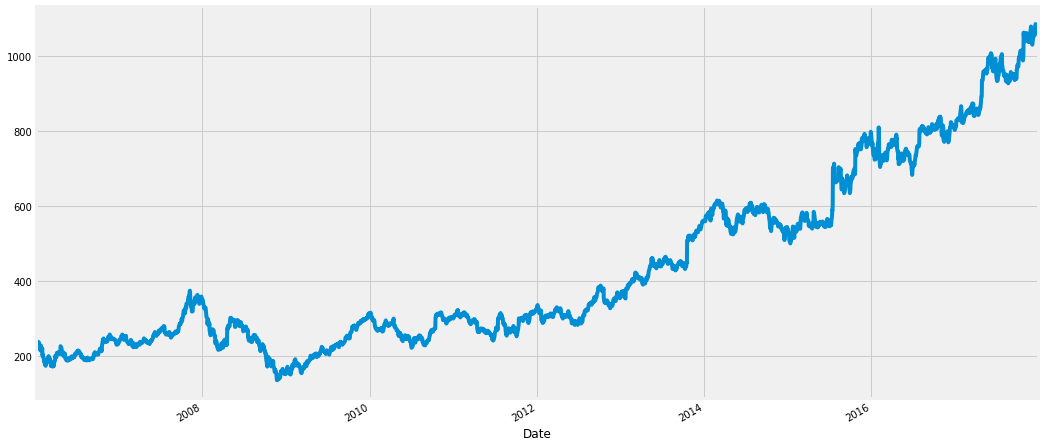

In [68]:
# Let's take Google stocks High for this
google["High"].plot(figsize=(16,8))

seasonal_decompose : 

In [75]:
google

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.030498,3.049759
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.005785,0.578549
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.041991,4.199115
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.006157,0.615737
...,...,...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL,0.994617,-0.538273
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL,0.997331,-0.266861
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL,0.999448,-0.055199


2006년부터 2017년까지 3019건이므로 연 평균 274건임

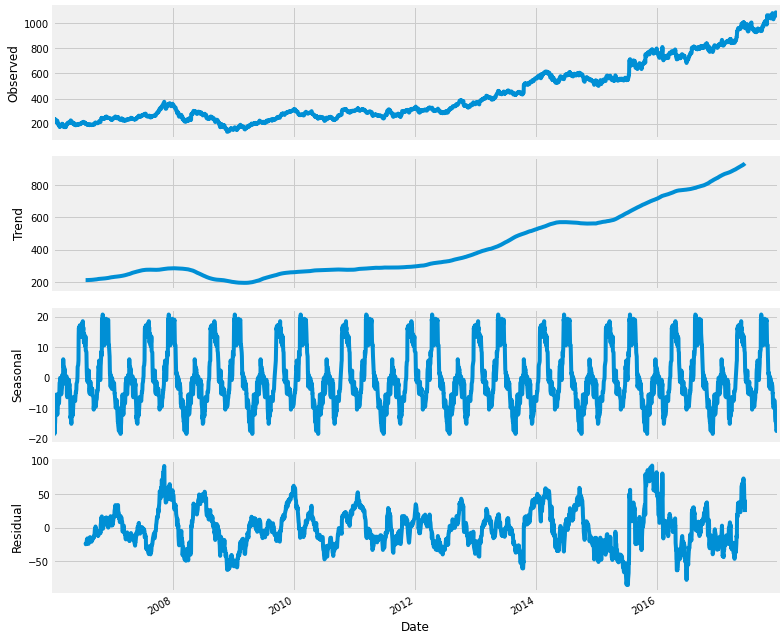

In [76]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
#decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=360) # The frequncy is annual
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],freq=274) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

* 위 그림에서 분명히 상승 추세가 있습니다.
* 또한 계절 변화가 일정하다는 것을 알 수 있습니다.
* 특이치 및 결측값을 나타내는 불균일 노이즈

In [70]:
decomposed_google_volume.observed

Date
2006-01-03     218.05
2006-01-04     224.70
2006-01-05     226.00
2006-01-06     235.49
2006-01-09     236.94
               ...   
2017-12-22    1071.72
2017-12-26    1068.86
2017-12-27    1068.27
2017-12-28    1064.84
2017-12-29    1058.05
Name: High, Length: 3019, dtype: float64

In [71]:
decomposed_google_volume.trend

Date
2006-01-03   NaN
2006-01-04   NaN
2006-01-05   NaN
2006-01-06   NaN
2006-01-09   NaN
              ..
2017-12-22   NaN
2017-12-26   NaN
2017-12-27   NaN
2017-12-28   NaN
2017-12-29   NaN
Name: High, Length: 3019, dtype: float64

In [72]:
decomposed_google_volume.seasonal

Date
2006-01-03   -0.215731
2006-01-04   -3.171136
2006-01-05   -0.276569
2006-01-06    1.969443
2006-01-09   -2.184094
                ...   
2017-12-22    2.475872
2017-12-26    2.448174
2017-12-27    2.867866
2017-12-28    3.805172
2017-12-29    4.109439
Name: High, Length: 3019, dtype: float64

In [73]:
decomposed_google_volume.resid

Date
2006-01-03   NaN
2006-01-04   NaN
2006-01-05   NaN
2006-01-06   NaN
2006-01-09   NaN
              ..
2017-12-22   NaN
2017-12-26   NaN
2017-12-27   NaN
2017-12-28   NaN
2017-12-29   NaN
Name: High, Length: 3019, dtype: float64

### <a id='3.1.1'>3.1.1 Compare with Humidity</a>

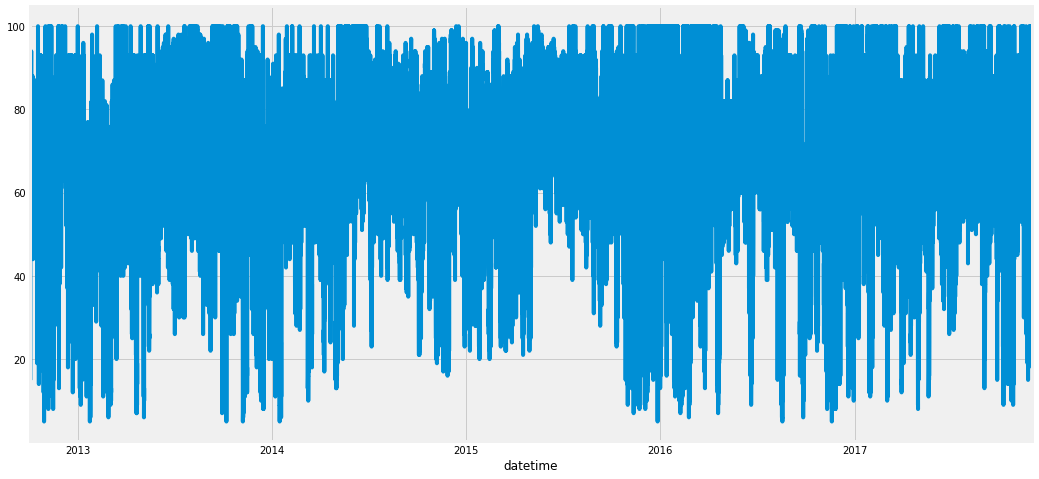

In [105]:
humidity["San Diego"].plot(figsize=(16,8))

In [106]:
humidity

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,92.0,86.0,88.0,69.0,65.0,71.0,69.0,99.0,76.0,94.0,74.0,86.0,87.0,81.0,93.0,76.0,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,87.0,81.0,22.0,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,57.0,20.0,45.0,27.0,58.0,64.0,37.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 21:00:00,87.0,71.0,22.0,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,57.0,23.0,48.0,29.0,58.0,59.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 22:00:00,87.0,71.0,22.0,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,57.0,27.0,52.0,31.0,58.0,66.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0


seasonal_decompose : 

2012-10-01년부터 2017-11-30까지 45252건임 (45252/24=1885.5)

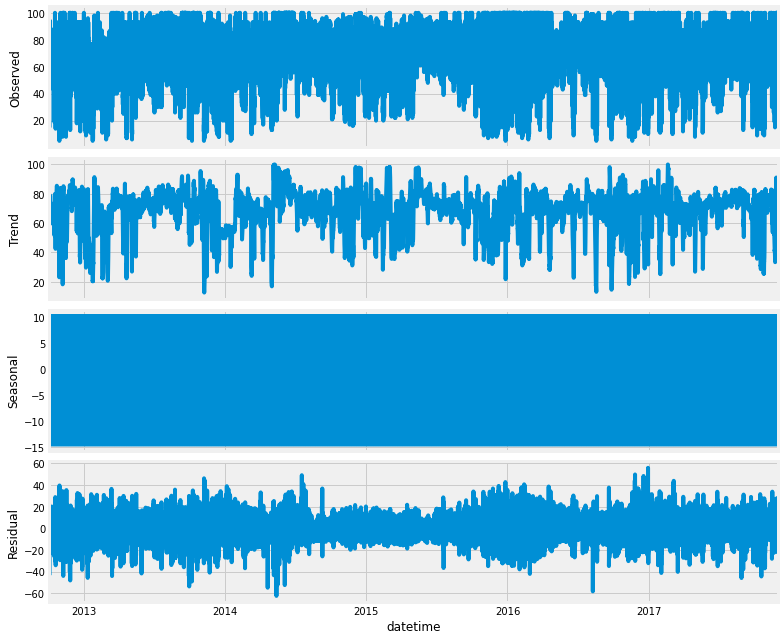

In [109]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_humidity = sm.tsa.seasonal_decompose(humidity["San Diego"],freq=24) # The frequncy is daily 24hour
figure = decomposed_humidity.plot()
plt.show()

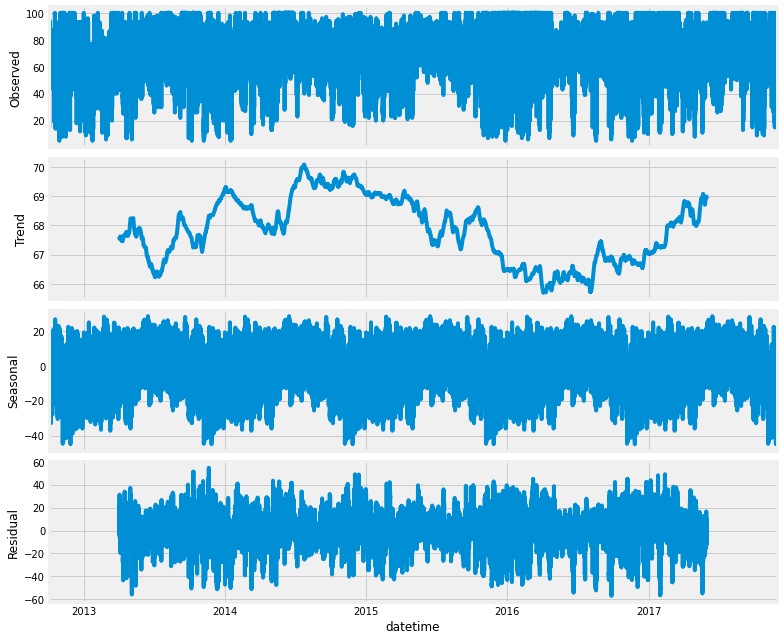

In [110]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_humidity = sm.tsa.seasonal_decompose(humidity["San Diego"],freq=8760) # The frequncy is annual
figure = decomposed_humidity.plot()
plt.show()

## <a id='3.2'>3.2. White noise</a>
화이트 노이즈(White noise)
* 일정한 평균
* 상수 분산
* 모든 지연(lag)에서 제로 auto-correlation

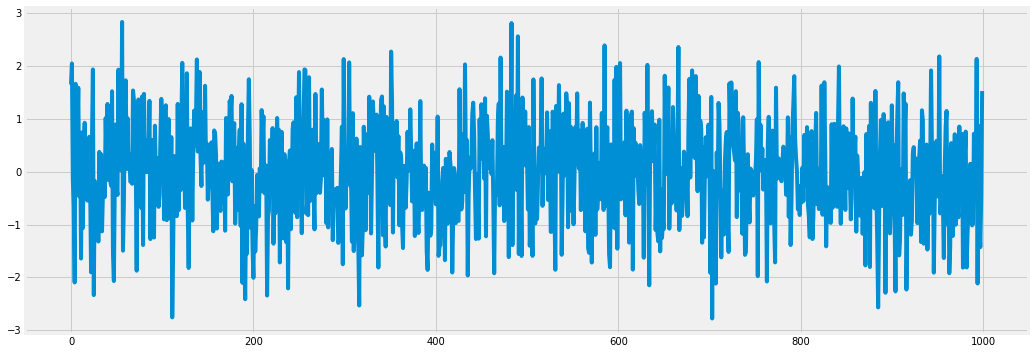

In [82]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

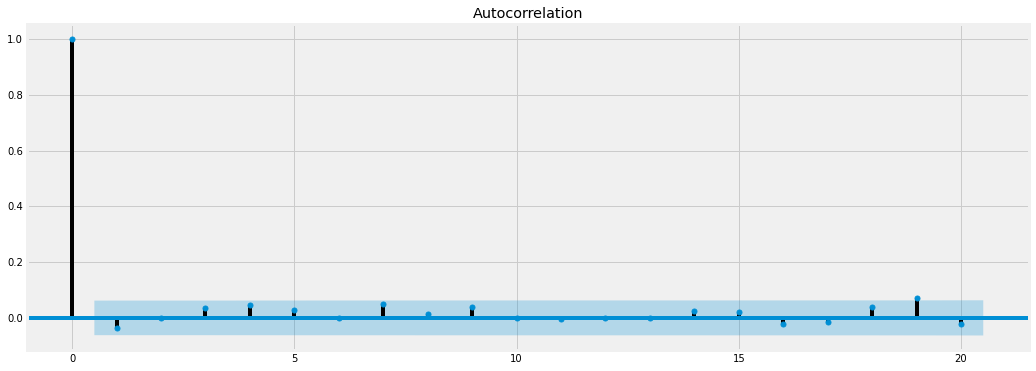

In [83]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

모든 지연(lag)이 신뢰 구간(음영 부분) 내에 있을 때 통계적으로 유의하지 않습니다.

## <a id='3.3'>3.3. Random Walk</a>
랜덤 워크는 확률 또는 랜덤 프로세스라고 하는 수학적 객체로, 정수와 같은 일부 수학적 공간에서 연속적인 랜덤 단계로 구성되는 경로를 설명합니다.

일반적으로 주식에 대해 이야기하면 오늘 가격 = 어제의 가격 + 소음

# P<sub>t</sub> = P<sub>t-1</sub> + ε<sub>t</sub> 

Noise가 랜덤이기 때문에 랜덤 워크를 예측할 수 없습니다.

Random Walk with Drift(drift(μ) is zero-mean)

#### P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub> 
<br>
Regression test for random walk

#### P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
#### Equivalent to  P<sub>t</sub> - P<sub>t-1</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
<br>
Test:

#### H<sub>0</sub>: β = 1 (This is a random walk)
#### H<sub>1</sub>: β < 1 (This is not a random walk)
<br>
Dickey-Fuller Test:

#### H<sub>0</sub>: β = 0 (This is a random walk)
#### H<sub>1</sub>: β < 0 (This is not a random walk)

### Augmented Dickey-Fuller test
augmented Dickey–Fuller 검정 (ADF)은 시계열 샘플에 단위근이 존재한다는 귀무 가설을 검정합니다. 기본적으로 RHS에서 지연된 변경 사항이 포함된 Dickey-Fuller 테스트입니다.

In [84]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of microsoft: 0.00032015252776519996
p-value of google: 6.510719605768194e-07


##### Microsoft는 p-value 0.0003201525가 0.05보다 작기 때문에 귀무 가설이 기각되며 이는 임의의 결과가 아닙니다.
##### 이제 Google은 p-value 0.0000006510이며 0.05보다 작기 때문에 귀무 가설이 기각되며 이는 임의의 결과가 아닙니다.


### Generating a random walk

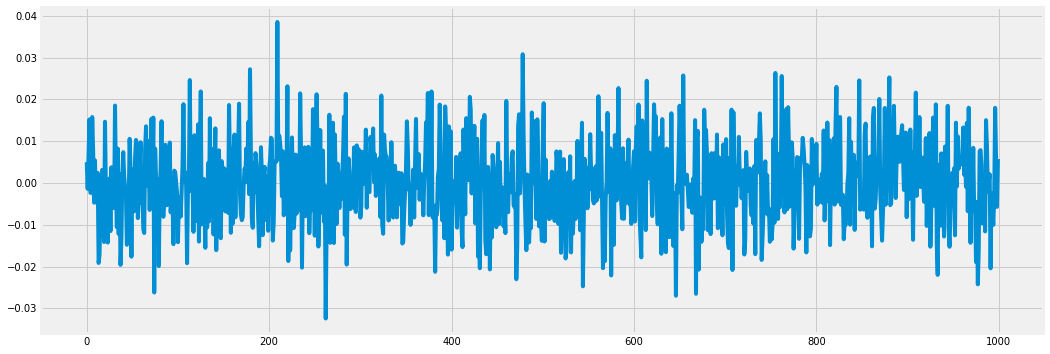

In [85]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [0]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)

In [87]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)

iplot(fig, filename='Basic Distplot')

Output hidden; open in https://colab.research.google.com to view.

## <a id='3.4'>3.4 Stationarity</a>
stationary time series 는 평균, 분산, 자기상관(autocorrelation) 등과 같은 통계적 속성이 시간이 지남에 따라 모두 일정합니다.

* Strong stationarity : 시간에 따라 변할 때 무조건적인 조인트 확률 분포(unconditional joint probability distribution)가 변하지 않는 확률적 프로세스(stochastic process)입니다. 결과적으로 평균 및 분산과 같은 매개 변수도 시간이 지나도 변하지 않습니다.
* Weak stationarity : 평균, 분산, 자기 상관이 시간이 지남에 따라 일정한 프로세스입니다.

시간에 종속적인 non-stationary series 는 시계열을 모델링 할 때 고려해야 할 매개 변수가 너무 많으므로 고정성(Stationarity)은 중요합니다. diff() 메서드는 non-stationarity 시리즈를 stationarity 시리즈로 쉽게 변환 할 수 있습니다.

위의 분해된 시계열의 계절 성분을 분해하려고 시도합니다.

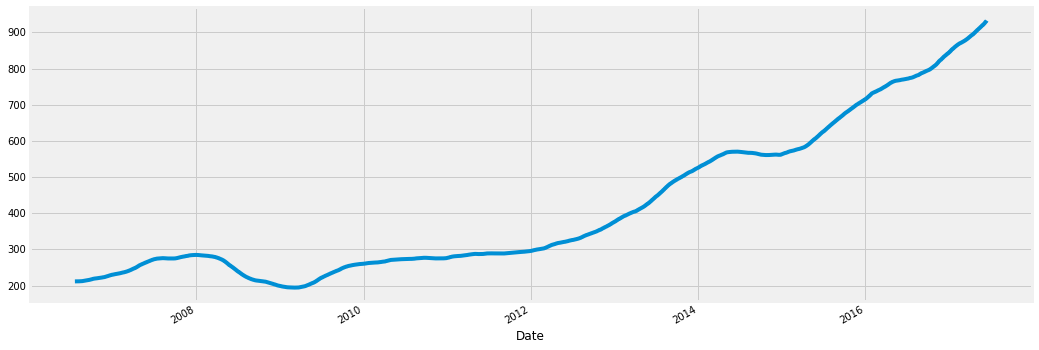

In [88]:
# The original non-stationary plot
decomposed_google_volume.trend.plot()

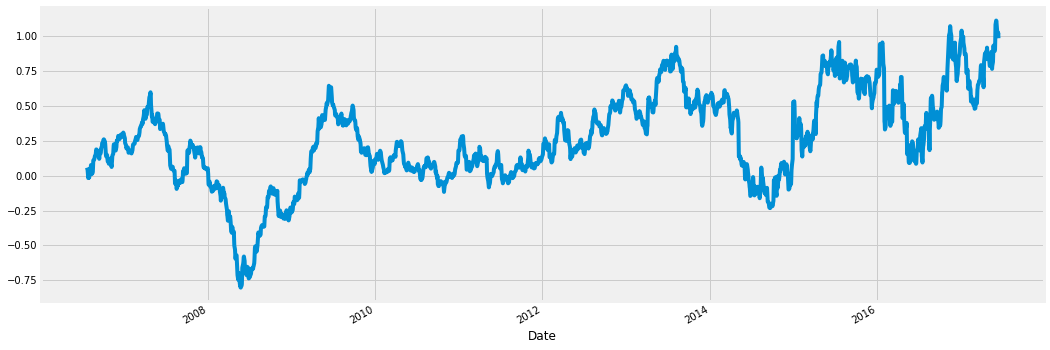

In [89]:
# The new stationary plot
decomposed_google_volume.trend.diff().plot()

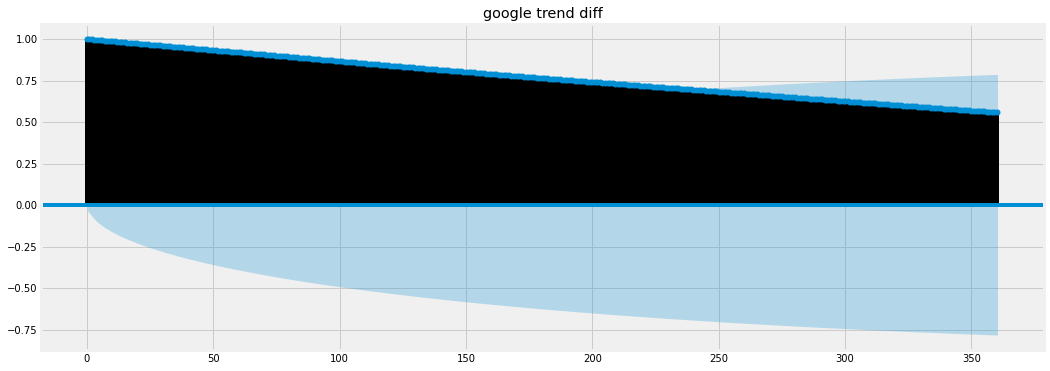

In [103]:
tmp_series = decomposed_google_volume.trend
tmp_series = tmp_series.dropna()

plot_acf(tmp_series,lags=360,title="google trend")
plt.show()

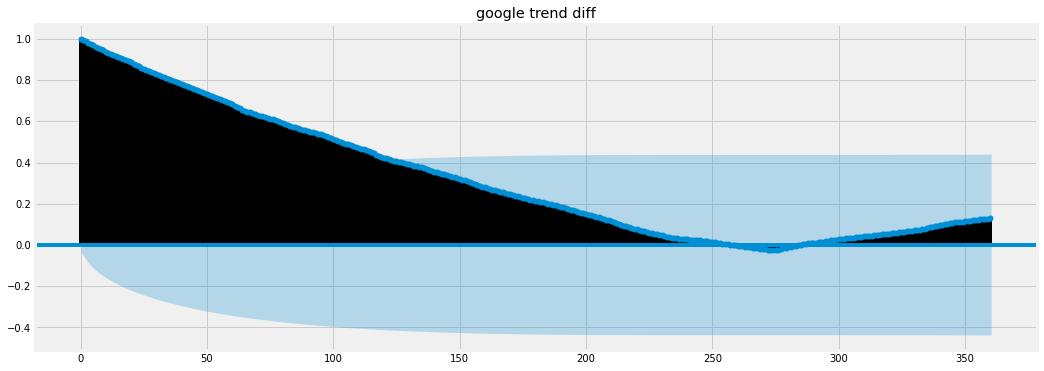

In [102]:
tmp_series = decomposed_google_volume.trend.diff()
tmp_series = tmp_series.dropna()

plot_acf(tmp_series,lags=360,title="google trend diff")
plt.show()

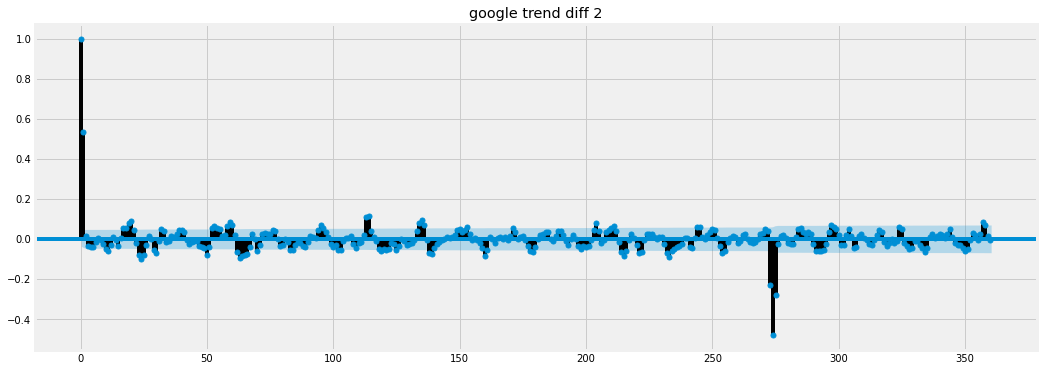

In [104]:
tmp_series = decomposed_google_volume.trend.diff()
tmp_series2 = tmp_series.diff()
tmp_series2 = tmp_series2.dropna()

plot_acf(tmp_series2,lags=360,title="google trend diff 2")
plt.show()

# <a id='4'>4. Modelling using statstools</a>

## <a id='4.1'>4.1 AR models</a>
AR (autoregressive) 모델은 랜덤 프로세스 유형을 나타냅니다. 따라서 자연, 경제 등의 time-varying 프로세스를 설명하는 데 사용됩니다. 자동 회귀 모형은 출력 변수가 이전의 값과 확률적 항(완전히 예측할 수없는 항)에 선형적으로 의존함을 명시하고; 따라서 모델은 확률차 방정식의 형태입니다.
 #### AR(1) model
 R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ε<sub>t</sub>
 #### RHS에 하나의 지연된 값 (R<sub>t-1</sub>) 만 있기 때문에 이것을 차수 1의 AR 모델이라고합니다. 여기서 μ는 평균이고 ε는 시간 t에서의 노이즈
 ϕ = 1 이면, 랜덤 워크(random walk) 입니다. ϕ = 0 이면, 화이트 노이즈(white noise) 입니다. -1 < ϕ < 1 이면, stationary 입니다. ϕ = -ve 이면, men reversion 이 있습니다. ϕ = +ve 이면, momentum 이 있습니다.
 #### AR(2) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ε<sub>t</sub>
 #### AR(3) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ϕ<sub>3</sub>R<sub>t-3</sub> + ε<sub>t</sub>


### Simulating AR(1) model

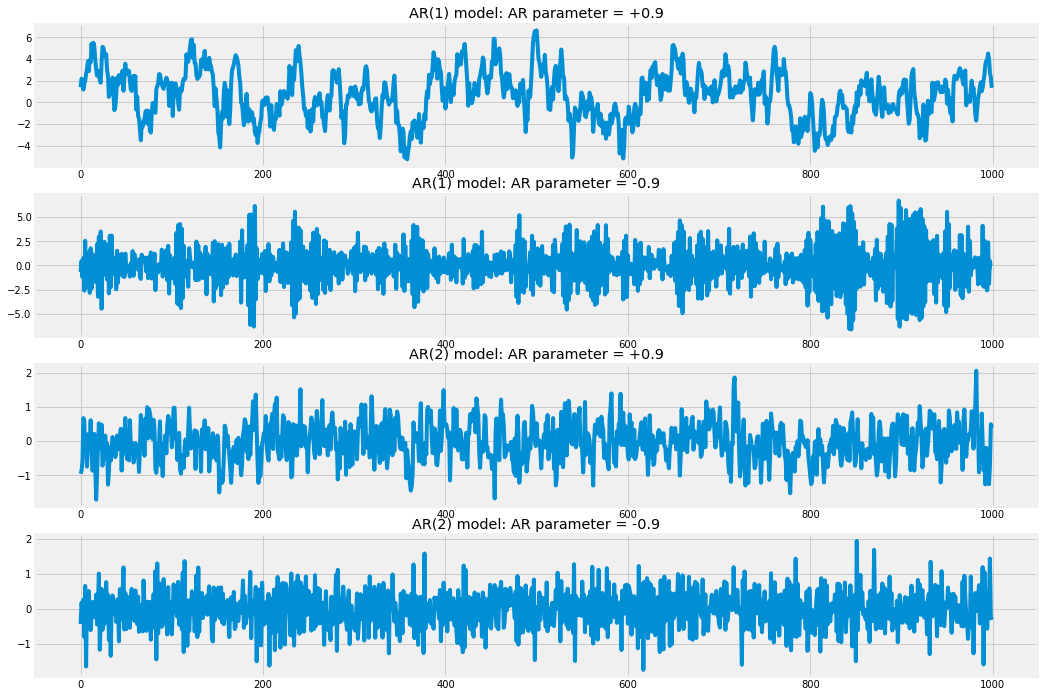

In [111]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

### Forecasting a simulated model

In [112]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Thu, 26 Mar 2020   AIC                           2837.403
Time:                        09:59:08   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

ϕ 는 약 0.9이며 이는 첫 번째 시뮬레이션 모델에서 AR 매개 변수로 선택한 것입니다.

### Predicting the models

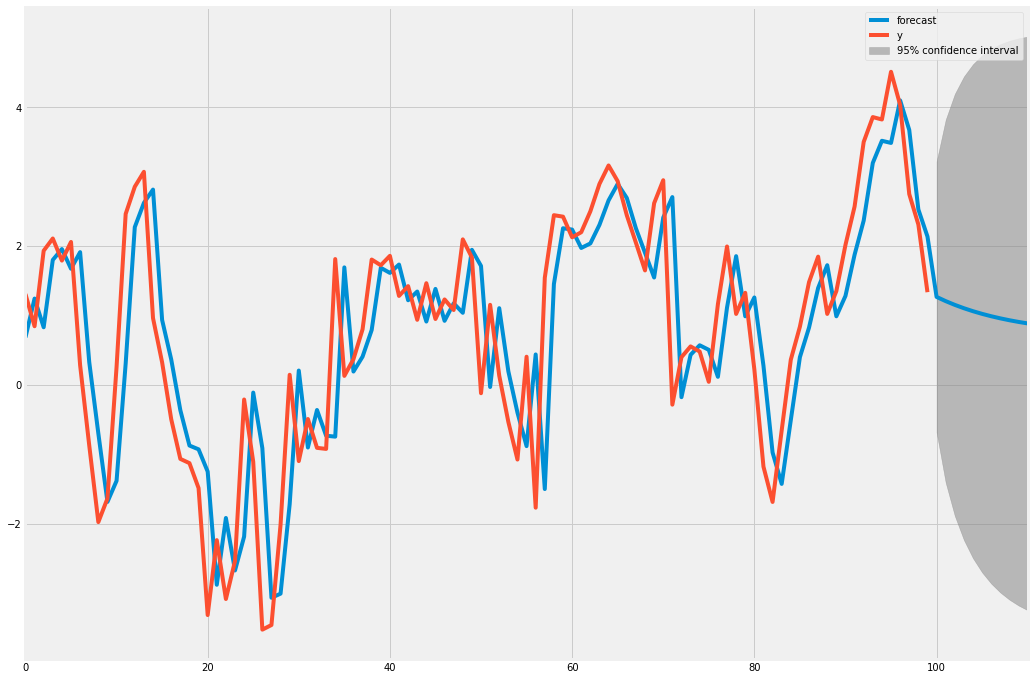

In [117]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [115]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054468092558.


y is predicted plot. Quite neat!

In [121]:
len(humidity["Montreal"])

45252

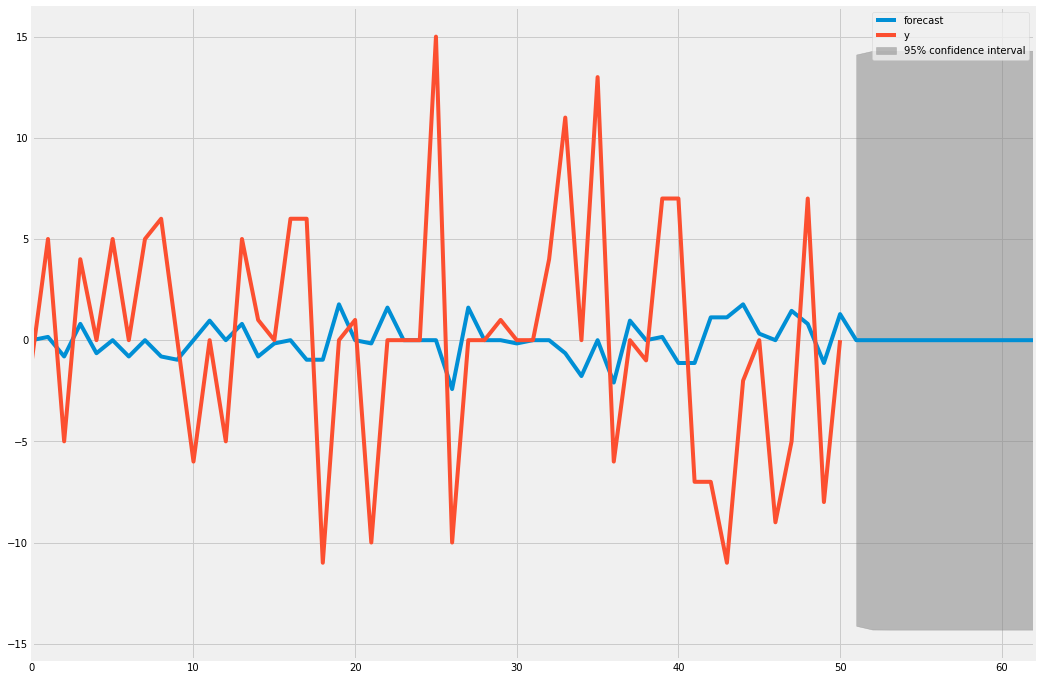

In [122]:
# Predicting humidity level of Montreal
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
#res.plot_predict(start=1000, end=1100)
res.plot_predict(start=45200, end=45262)
plt.show()

In [123]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 7.218388576072127.


 Not quite impressive. But let's try google stocks. 

In [124]:
len(google["Close"])

3019

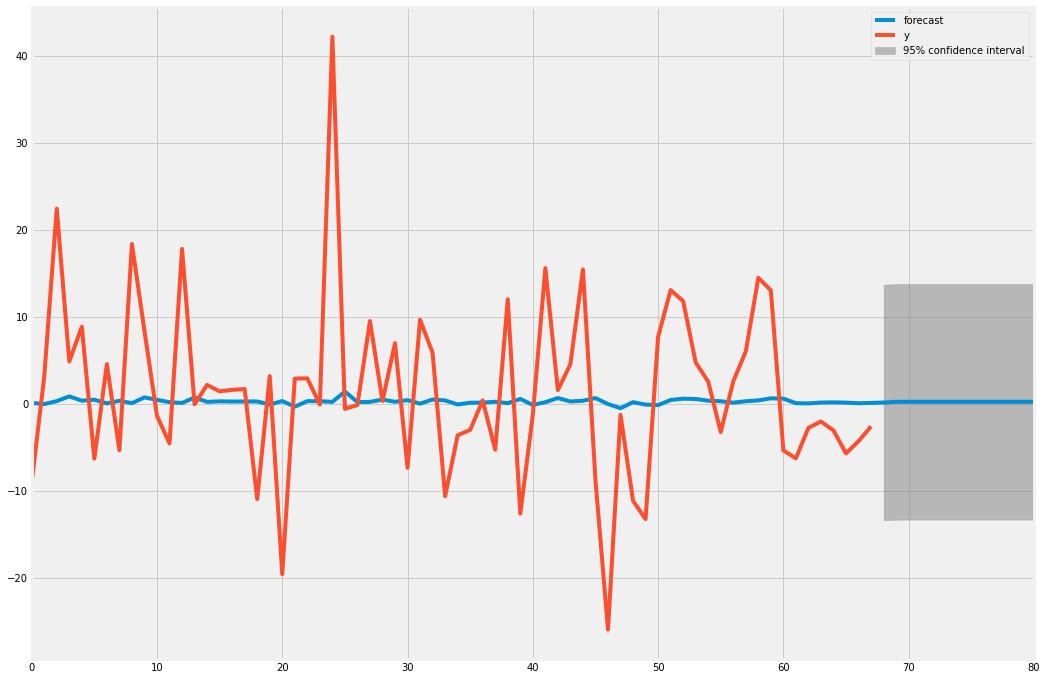

In [125]:
# Predicting closing prices of google
humid = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
#res.plot_predict(start=900, end=1010)
res.plot_predict(start=2950, end=3030)
plt.show()

항상 더 나은 모델이 있습니다.

## <a id='4.2'>4.2 MA models</a>
이동 평균 (MA) 모델은 단변량(univariate) 시계열을 모델링하는 일반적인 방법입니다. 이동 평균 모델은 출력 변수가 확률론적 (완전히 예측할 수 없는) 항의 현재 및 다양한 과거 값에 선형으로 종속되도록 지정합니다.
#### MA(1) model
R<sub>t</sub> = μ  +  ϵ<sub>t</sub>1 + θϵ<sub>t-1</sub>

오늘의 수익 = 평균 + 오늘의 노이즈 + 어제의 노이즈 으로 변환됩니다.
##### RHS에는 1 개의 지연 값만 있기 때문에 차수 1의 MA 모델입니다.

### Simulating MA(1) model

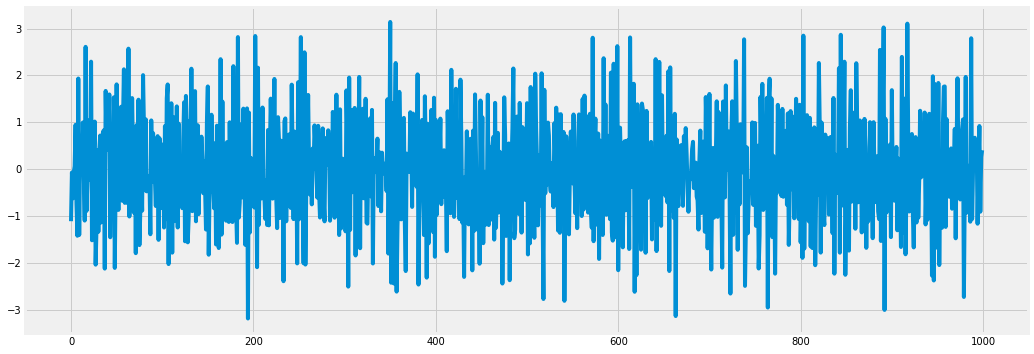

In [127]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

### Forecasting the simulated MA model

In [128]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1443.024
Method:                       css-mle   S.D. of innovations              1.024
Date:                Thu, 26 Mar 2020   AIC                           2892.049
Time:                        10:07:47   BIC                           2906.772
Sample:                             0   HQIC                          2897.644
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0135      0.016     -0.822      0.411      -0.046       0.019
ma.L1.y       -0.4947      0.027    -18.213      0.000      -0.548      -0.441
                                    Roots           

### Prediction using MA models

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Thu, 26 Mar 2020   AIC                         307043.965
Time:                        10:09:43   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.316      0.0

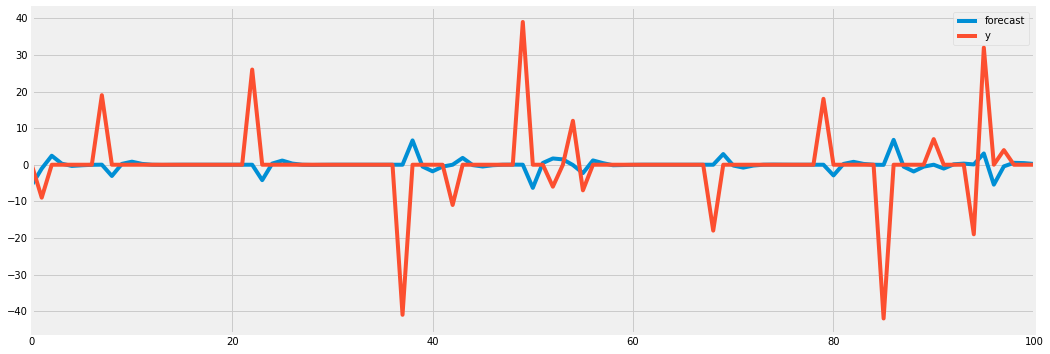

In [133]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [134]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.34512804398336.


In [131]:
len(humidity["Montreal"])

45252

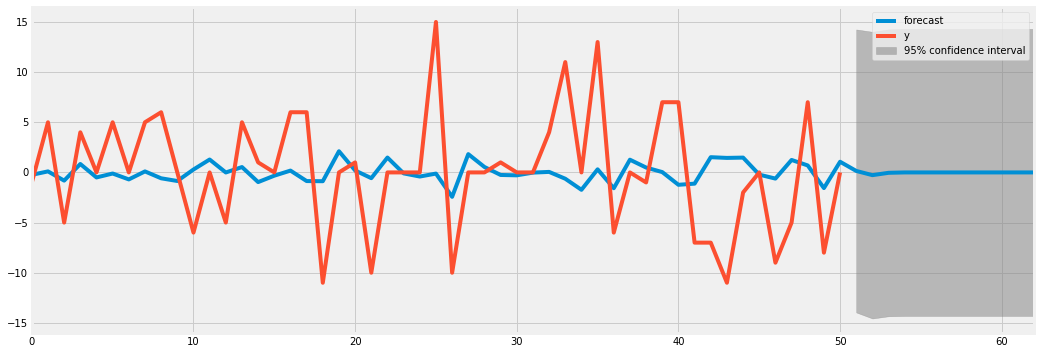

In [138]:
# Forecasting and predicting montreal humidity
result.plot_predict(start=45200, end=45262)
plt.show()

## <a id='4.3'>4.3 ARMA models</a>
ARMA (Autoregressive–moving-average) 모델은 두 개의 다항식(하나는 자동 회귀에 대한 것이고 다른 하나는 이동 평균에 대한)으로 (weak) stationary stochastic process에 대한 설명을 제공합니다. AR과 MA 모델의 융합입니다.
### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub> 
기본적으로 오늘의 수익 = 평균 + 어제의 수익 + 노이즈 + 어제의 노이즈 입니다.

### Prediction using ARMA models
I am not simulating any model because it's quite similar to AR and MA models. Just  forecasting and predictions for this one.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751607.446
Date:                Thu, 26 Mar 2020   AIC                         110833.948
Time:                        10:12:41   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9914.092     -2.047      0.041   -3.97e+04    -865.958
ar.L1.y        0.2052      0.159      1.287      0.198      -0.107       0.518
ar.L2.y        0.7297      0.179      4.082      0.0

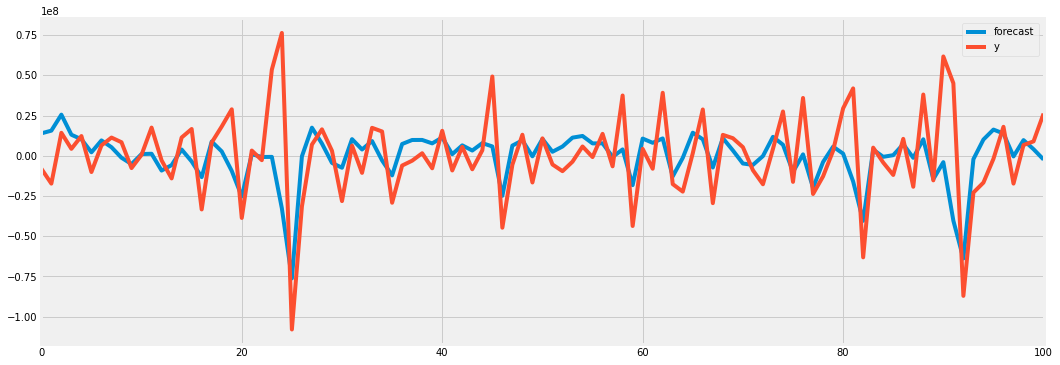

In [139]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [140]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038375.50698424.


ARMA 모델은 AR 및 MA 모델보다 훨씬 나은 결과를 보여줍니다.

In [141]:
len(microsoft["Volume"])

3019

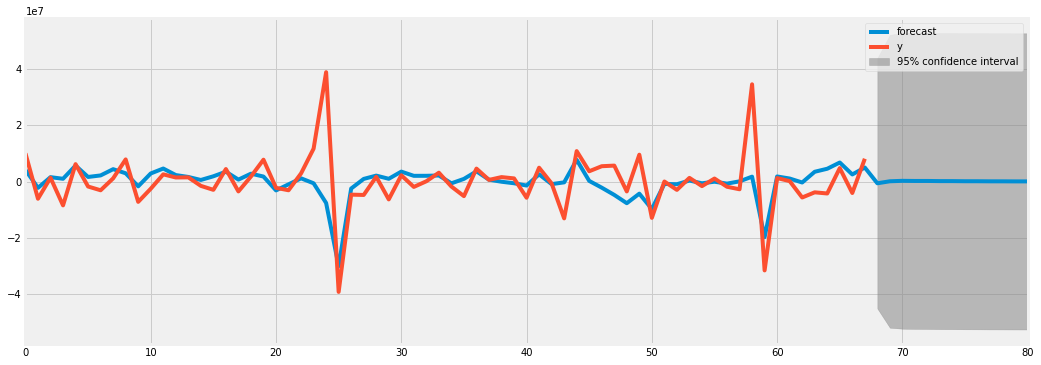

In [142]:
result.plot_predict(start=2950, end=3030)
plt.show()

## <a id='4.4'>4.4 ARIMA models</a>
ARIMA (Autoregressive Integrated Moving Average) 모델은 ARMA (Autoregressive Moving Average) 모델의 일반화입니다. 이 두 모델은 데이터를 더 잘 이해하거나 시리즈의 미래 지점을 예측하기 위한 시계열 데이터에 적합합니다. ARIMA 모델은 데이터에 정상이 아닌 증거가 표시되는 경우에 적용되며, 초기 차이 단계 (모델의 "통합된(Integrated)"부분에 해당)를 한 번 이상 적용하여 비고정성(non-stationarity)을 제거할 수 있습니다. ARIMA 모델의 형식은 다음과 같습니다. ARIMA (p, d, q) : p는 AR 매개 변수, d는 차분(differential) 매개 변수, q는 MA 매개 변수

### ARIMA(1,0,0)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub>**
### ARIMA(1,0,1)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>**
### ARIMA(1,1,1)
**Δy<sub>t</sub> = a<sub>1</sub>Δy<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>** where **Δy<sub>t</sub> = y<sub>t</sub> - y<sub>t-1</sub>**

### Prediction using ARIMA model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.011
Date:                Thu, 26 Mar 2020   AIC                         112778.933
Time:                        10:19:20   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

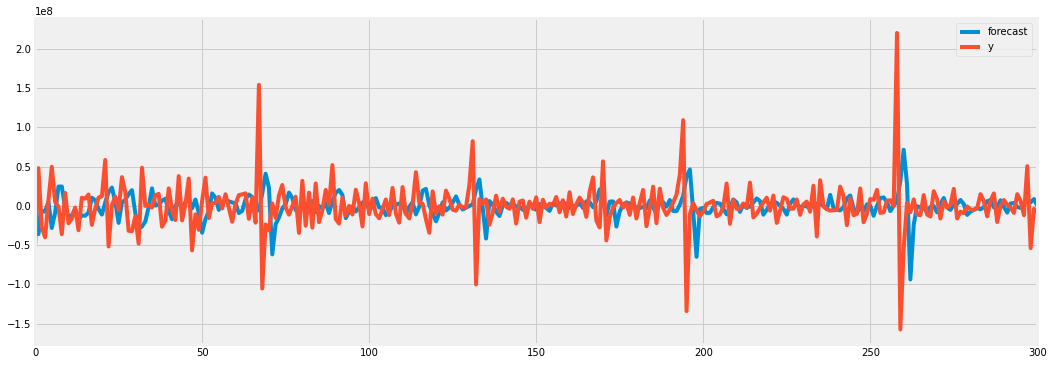

In [143]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [144]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937609.59903903.


약간의 지연을 고려하면 이것은 훌륭한 모델입니다.

In [145]:
len(microsoft["Volume"])

3019

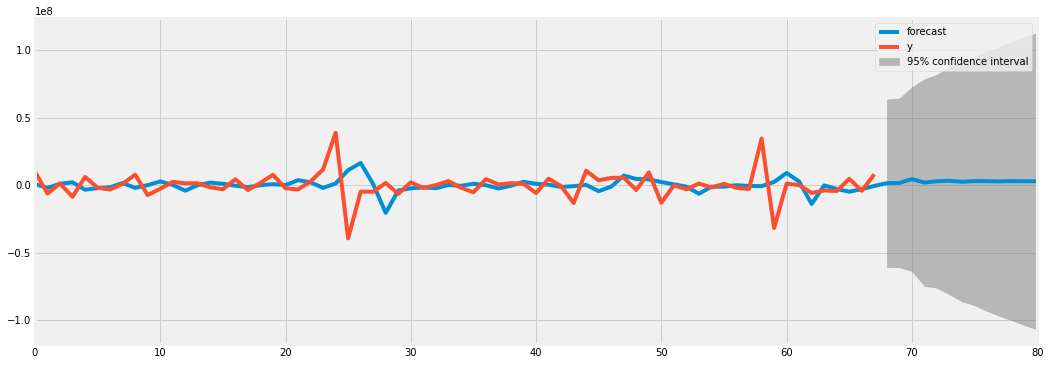

In [146]:
result.plot_predict(start=2950, end=3030)
plt.show()

## <a id='4.5'>4.5 VAR models</a>
VAR (Vector AutoRegression)은 여러 시계열 간의 선형 상호 종속성을 캡처하는 데 사용되는 확률적 프로세스 모델입니다. VAR 모델은 둘 이상의 변화하는 변수(evolving variable)를 허용하여 단변량(univariate) 자기 회귀 모델 (AR 모델)을 일반화합니다. VAR의 모든 변수는 동일한 방식으로 모델에 입력됩니다. 각 변수에는 고유한 지연 값, 다른 모델 변수의 지연값 및 오류항을 기반으로 한 진화(evolution)를 설명하는 방정식이 있습니다. VAR 모델링은 동시 방정식을 사용하는 구조적 모델처럼 변수에 영향을 미치는 힘에 대해 많은 지식이 필요하지 않습니다. 필요한 유일한 사전 지식은 시간적으로 서로에게 영향을 주기 위해 가정될 수 있는 변수의 목록입니다.

<img src="http://gdurl.com/VvRm">

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.173
                          + intercept   AIC                          24404.346
Date:                Thu, 26 Mar 2020   BIC                          24506.556
Time:                        10:23:41   HQIC                         24441.099
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                77.67, 78.76   Jarque-Bera (JB):   48240.56, 14927.64
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.32, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

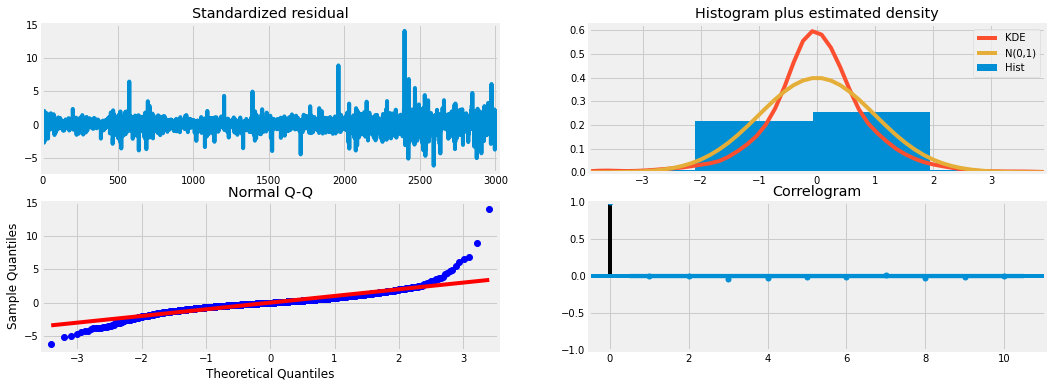

In [147]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

## <a id='4.6'>4.6 State Space methods</a>

A general state space model is of the form

y<sub>t</sub>=Z<sub>t</sub>α<sub>t</sub>+d<sub>t</sub>+ε<sub>t</sub>

α<sub>t</sub>=T<sub>t</sub>α<sub>t</sub>−1+c<sub>t</sub>+R<sub>t</sub>η<sub>t</sub>

where y<sub>t</sub> refers to the observation vector at time t, α<sub>t</sub> refers to the (unobserved) state vector at time t, and where the irregular components are defined as

ε<sub>t</sub>∼N(0,H<sub>t</sub>)

η<sub>t</sub>∼N(0,Q<sub>t</sub>)

방정식의 나머지 변수 (Z<sub>t</sub>,d<sub>t</sub>,H<sub>t</sub>,T<sub>t</sub>,c<sub>t</sub>,R<sub>t</sub>,Q<sub>t</sub>)는 프로세스를 설명하는 행렬입니다. 변수 이름과 치수는

Z : design (k_endog×k_states×nobs)

d : obs_intercept (k_endog×nobs)

H : obs_cov (k_endog×k_endog×nobs)

T : transition (k_states×k_states×nobs)

c : state_intercept (k_states×nobs)

R : selection (k_states×k_posdef×nobs)

Q : state_cov (k_posdef×k_posdef×nobs)

행렬 중 하나가 시간에 따라 변하지 않는 경우 (예를 들어 Z<sub>t</sub>=Z<sub>t</sub>+1 ∀ <sub>t</sub>), 마지막 차원의 크기는 nob가 아닌 1의 크기일 수 있습니다.

이 일반 형식은 가장 널리 사용되는 선형 시계열 모델 (아래 참조)을 많이 캡슐화하고 매우 유연하므로 관측 누락, 예측, 임펄스 응답 함수 등으로 추정 할 수 있습니다.

Source: [statsmodels](https://www.statsmodels.org/dev/statespace.html)

### <a id='4.6.1'>4.6.1 SARIMA models</a>
SARIMA 모델은 계절별 시계열 모델링에 유용하며, 주어진 계절에 대한 평균 및 기타 통계는 수년에 걸쳐 고정적이지 않습니다. 정의된 SARIMA 모델은 제시된 비 계절 자기 회귀 이동 평균 (ARMA) 및 자기 회귀 통합 이동 평균 (ARIMA) 모델의 간단한 확장을 구성합니다.

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10098.484
Date:                Thu, 26 Mar 2020   AIC                          20216.968
Time:                        10:25:25   BIC                          20277.092
Sample:                             0   HQIC                         20238.588
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1191      0.048      2.491      0.013       0.025       0.213
ar.L1          0.2282      0.006     36.644      0.000       0.216       0.240
ar.L2          1.1220      0.005    216.396      0.0

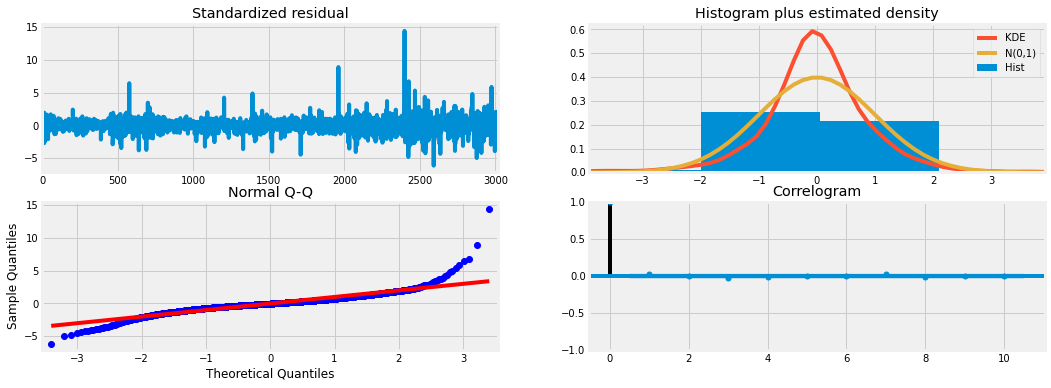

In [148]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

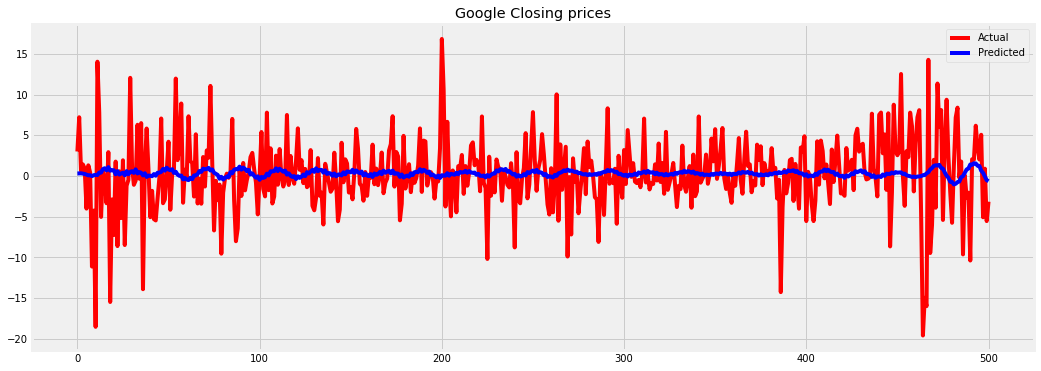

In [149]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

### <a id='4.6.2'>4.6.2 Unobserved components</a>
UCM은 반응 계열을 경향, 계절, 주기 및 예측 변수 계열로 인한 회귀 효과와 같은 구성 요소로 분해합니다.

The following model shows a possible scenario:

<img src="http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/images/etsug_ucm0134.png">

Source: [http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm](http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm)

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Thu, 26 Mar 2020   AIC                          20237.023
Time:                        10:26:52   BIC                          20249.047
Sample:                             0   HQIC                         20241.346
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (Q):              

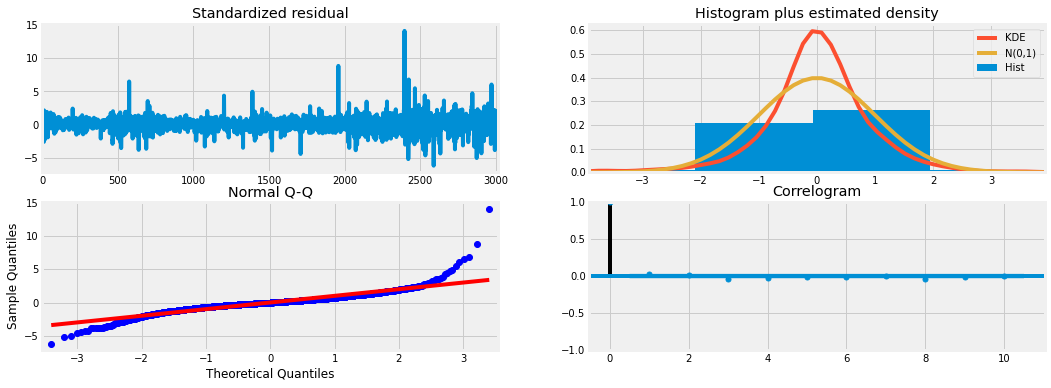

In [150]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

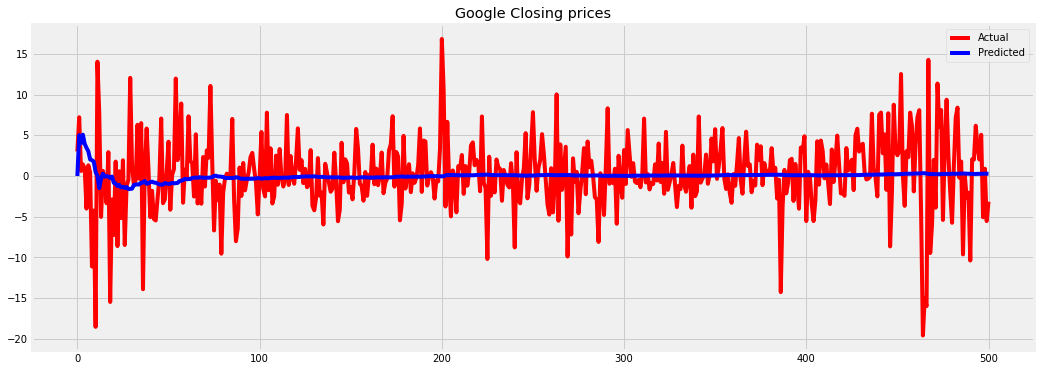

In [151]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

### <a id='4.6.3'>4.6.3 Dynamic Factor models</a>
동적 인자 모델은 관측된 내생 변수가 외인성 공변량 및 관찰되지 않은 인자의 선형 함수이며 벡터 자동 회귀 구조를 갖는 다변량 시계열에 대한 유연한 모델입니다. 관찰되지 않은 인자는 또한 외인성 공변량의 함수일 수 있다. 종속 변수에 대한 방정식의 교란은 자기 상관 관계가 있을 수 있습니다.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                 3018
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -12198.578
Date:                               Thu, 26 Mar 2020   AIC                          24409.156
Time:                                       10:27:32   BIC                          24445.230
Sample:                                            0   HQIC                         24422.128
                                              - 3018                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):                77.67, 95.04   Jarque-Bera (JB):   48193.36, 15037.45
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.36, 1.62   Skew:                      1.14, -0

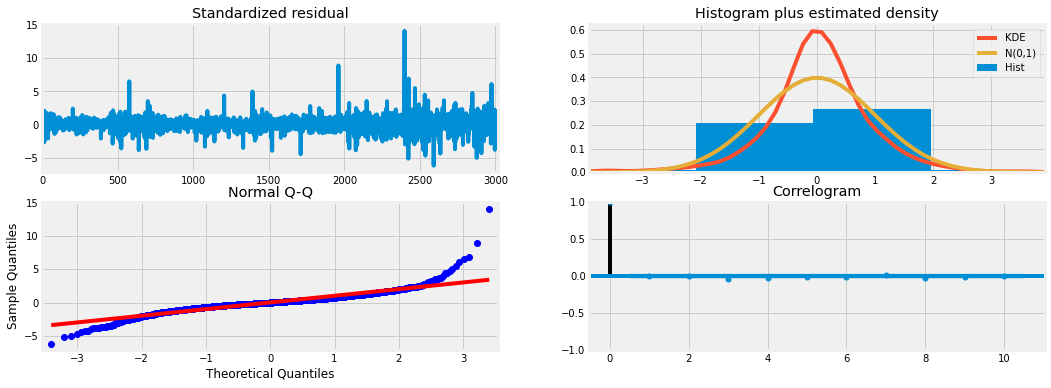

In [152]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

I may add more regression models soon and there is much more stuff to cover. **But in my experience, the best models for time series forecasting are LSTM based Recurrent Neural Networks. I have prepared a detailed tutorial for that. Here is the link: <u>https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru</u>**

References and influences(These have more in-depth content and explanations): 
* [Manipulating Time Series Data in Python](https://www.datacamp.com/courses/manipulating-time-series-data-in-python)
* [Introduction to Time Series Analysis in Python](https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python)
* [Visualizing Time Series Data in Python](https://www.datacamp.com/courses/visualizing-time-series-data-in-python)
* [VAR models and LSTM](https://www.youtube.com/watch?v=_vQ0W_qXMxk)
* [State space models](https://www.statsmodels.org/dev/statespace.html)

Stay tuned for more! And don't forget to upvote and comment.